In [1]:
from utils import clustering_eval
import pandas as pd
import os
from sentence_transformers import SentenceTransformer
from ast import literal_eval
from pprint import pprint

df = pd.read_csv(os.path.abspath("C:\\Users\\mokrota\\Documents\\GitHub\\math_problem_recommender\\math_problem_recommender\\andreescu-andrica-problems-on-number-theory\\benchmark_v1.csv"))
df["Problem&Solution"] = df["Problem&Solution"].apply(literal_eval)
df = df.explode(column=["Problem&Solution"]).reset_index().rename(columns={"index": 'label'})
df = df[["label", "Problem&Solution"]].rename(columns={"Problem&Solution": 'text'})

sample_models = 30

In [2]:
from random import uniform
from pprint import pprint

def test_model(model):
    thresholds = [uniform(0.0, 1.0) for _ in range(sample_models)]
    best_score = None
    best_threshold = None
    best_clusters = None
    best_fig = None
    best_metrics_d = None
    for threshold in thresholds:
        clusters, fig, metrics_d = clustering_eval(df, model, min_community_size=1, threshold=threshold, log=False)
        m = metrics_d['adjusted random score']
        if not best_score or m > best_score:
            best_clusters = clusters
            best_fig = fig
            best_metrics_d = metrics_d
            best_score = m
            best_threshold = threshold
    pprint(f"Best Threshold: {best_threshold};\nBest scores: {best_metrics_d};\nBest clusters: {best_clusters}")
    best_fig.show()

    return best_clusters, best_fig, best_metrics_d, best_threshold

## Baseline (out of the box model)

In [3]:
model = SentenceTransformer("all-MiniLM-L6-v2")
oob_res = test_model(model)

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

('Best Threshold: 0.6753357908725841;\n'
 "Best scores: {'random score': 0.973181186283596, 'adjusted random score': "
 "0.04764056193318803, 'nmi': 0.741300411997155};\n"
 'Best clusters: [[275, 285, 366, 408, 407, 367, 61, 286, 409], [237, 232, '
 '229, 231, 230, 247], [75, 85, 324, 68, 338], [112, 119, 227, 304, 215], '
 '[375, 379, 402, 387, 382], [153, 154, 134, 358], [17, 18, 19, 20], [26, 140, '
 '204, 161], [34, 35, 36, 33], [152, 157, 386, 381], [248, 246, 32, 25], [290, '
 '293, 294, 292], [396, 383, 210, 130], [365, 411, 267], [371, 362, 160], '
 '[255, 3, 281], [376, 390, 389], [11, 14, 7], [45, 86, 302], [87, 95, 88], '
 '[98, 179, 219], [180, 70, 175], [202, 340, 203], [233, 235, 236], [309, 308, '
 '325], [319, 328, 341], [271, 102], [22, 21], [100, 103], [355, 361], [66, '
 '311], [10, 278], [29, 398], [43, 62], [47, 401], [48, 364], [49, 166], [52, '
 '78], [58, 394], [71, 177], [83, 151], [93, 94], [109, 332], [115, 142], '
 '[126, 149], [158, 195], [162, 339], [214, 

# Unsupervised methods

## Trained with TSDAE

In [4]:
model = SentenceTransformer("models/tsdae-model")
tsdae_res = test_model(model)

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

('Best Threshold: 0.9889615672593656;\n'
 "Best scores: {'random score': 0.9734360518999073, 'adjusted random score': "
 "0.011995120168837366, 'nmi': 0.746094165085115};\n"
 'Best clusters: [[260, 255, 337, 52, 29], [48, 377, 335, 98], [49, 405, 383, '
 '396], [62, 274, 151, 83], [185, 84, 165, 257], [275, 366, 371, 407], [401, '
 '395, 384, 393], [331, 47, 386], [26, 412, 204], [34, 35, 36], [57, 398, '
 '385], [263, 270, 112], [375, 376, 389], [394, 58, 403], [25, 32], [97, 116], '
 '[99, 340], [109, 147], [128, 182], [219, 336], [229, 231], [285, 303], [286, '
 '408], [290, 293], [346, 353], [355, 361], [359, 360], [140], [409], [207], '
 '[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], '
 '[14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [27], '
 '[28], [30], [31], [33], [37], [38], [39], [40], [41], [42], [43], [44], '
 '[45], [46], [50], [51], [53], [54], [55], [56], [59], [60], [61], [63], '
 '[64], [65], [66], [67], [68], [69], [70], 

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_res(results):
    baseline = oob_res[2]
    results['baseline'] = baseline
    fig, ax = plt.subplots(layout='constrained')
    nr_metrics = 0
    for i in results:
        nr_metrics = len(results[i].keys())
        metrics_names = results[i].keys()
        break

    width = 0.25
    x = np.arange(nr_metrics)
    multiplier = 0

    for method, metrics in results.items():
        offset = width * multiplier
        rects = ax.bar(x + offset, list(metrics.values()), width=width, label=method)
        ax.bar_label(rects, padding=3)  
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Score')
    ax.set_title('Metrics on clustering task benchmarkv1')
    ax.set_xticks(x + width, metrics_names)
    ax.legend(loc='upper left', ncols=3)

    plt.show()

## Trained with SimCSE

In [6]:
model = SentenceTransformer("models/simcse-model")
simcse_res = test_model(model)

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

Batches:   0%|          | 0/7 [00:00<?, ?it/s]

('Best Threshold: 0.996315254728084;\n'
 "Best scores: {'random score': 0.9714782205746061, 'adjusted random score': "
 "0.0196638909676481, 'nmi': 0.7172824556250789};\n"
 'Best clusters: [[41, 88, 103, 105, 95, 227, 149, 102, 94, 99, 228, 108], '
 '[252, 354, 52, 346, 203, 133, 232, 32, 25], [370, 62, 390, 132, 402, 392, '
 '291, 66, 6], [150, 93, 142, 195, 144, 288, 325], [405, 391, 60, 403, 43, '
 '396], [387, 376, 375, 53, 401, 397], [286, 9, 85, 160, 266], [126, 100, 90, '
 '124, 96], [147, 109, 74, 219], [172, 335, 4, 114], [240, 303, 246, 317], '
 '[395, 398, 220], [36, 35, 34], [230, 294, 256], [357, 10, 279], [49, 404, '
 '399], [116, 119, 125], [31, 146, 26], [255, 24, 23], [259, 309, 153], [305, '
 '315, 316], [364, 330], [384, 212], [14, 1], [2, 33], [55, 107], [80, 225], '
 '[7, 11], [13, 293], [42, 136], [47, 355], [54, 328], [394, 58], [61, 273], '
 '[134, 231], [148, 194], [152, 171], [184, 415], [234, 235], [238, 241], '
 '[261, 271], [280, 366], [283, 285], [365, 372

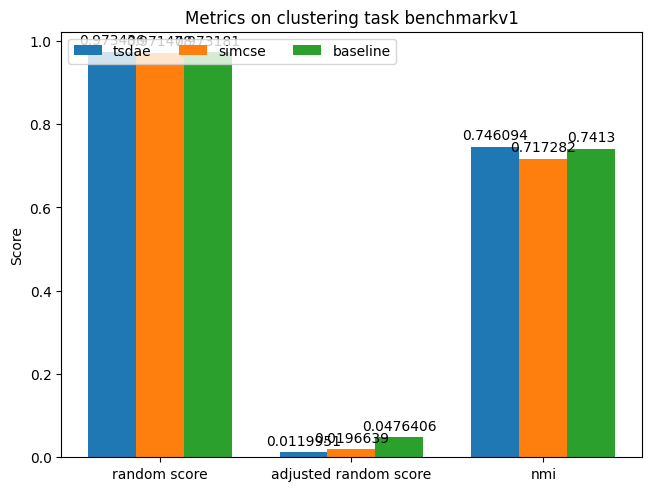

In [7]:
plot_res({"tsdae": tsdae_res[2], "simcse": simcse_res[2]})

Apparently all unsupervised methods perform poorly because of domain specific words and symbols.

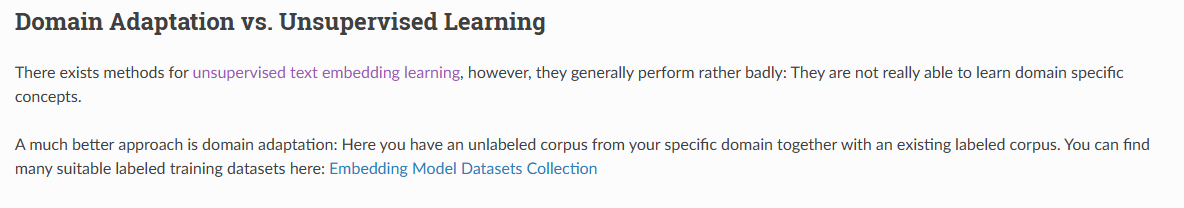